In [1]:
# importing the necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# loading the dataset
df = pd.read_excel('C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\Capstone Project\\Project Work\\Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [11]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [13]:
df.shape

(11260, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [17]:
# viewing the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [19]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [21]:
df.duplicated().sum()

0

## UNIVARIATE ANALYSIS

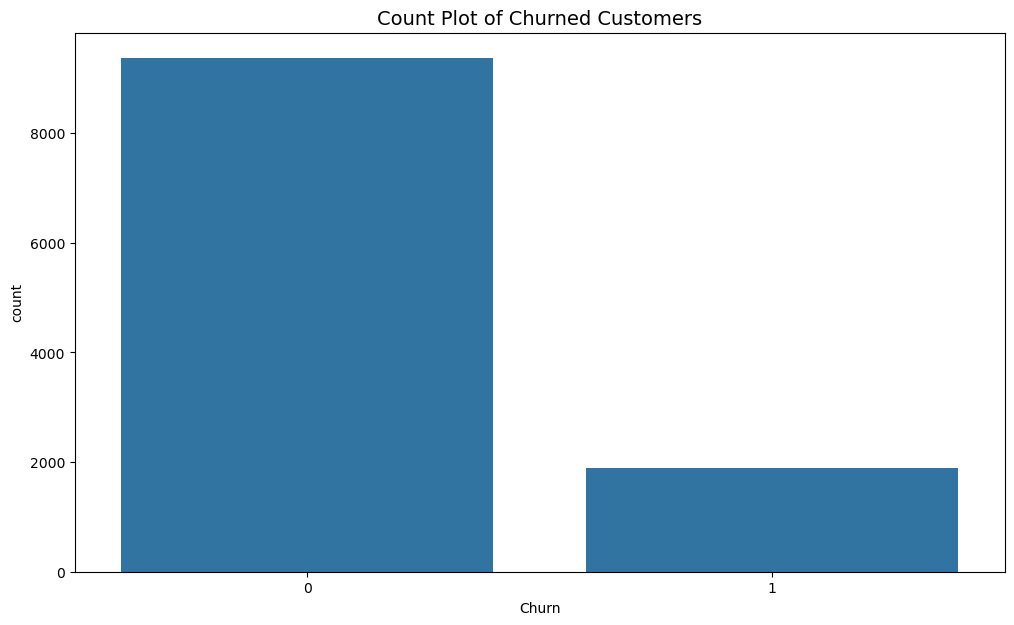

In [77]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Churn')
plt.title('Count Plot of Churned Customers', fontsize=14)
plt.xlabel('Churn')
plt.show()

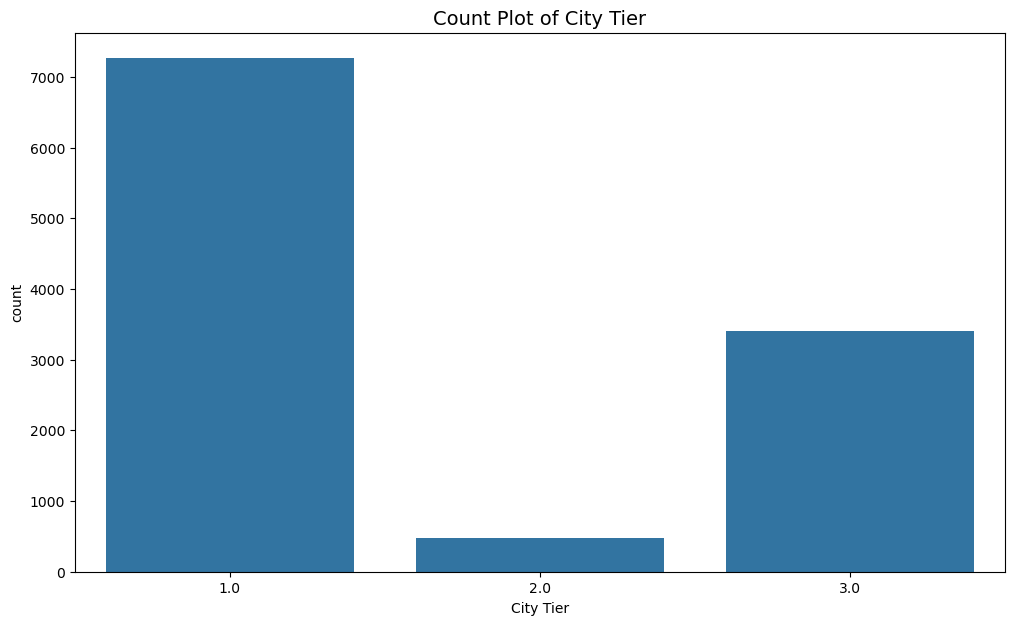

In [79]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'City_Tier')
plt.title('Count Plot of City Tier', fontsize=14)
plt.xlabel('City Tier')
plt.show()

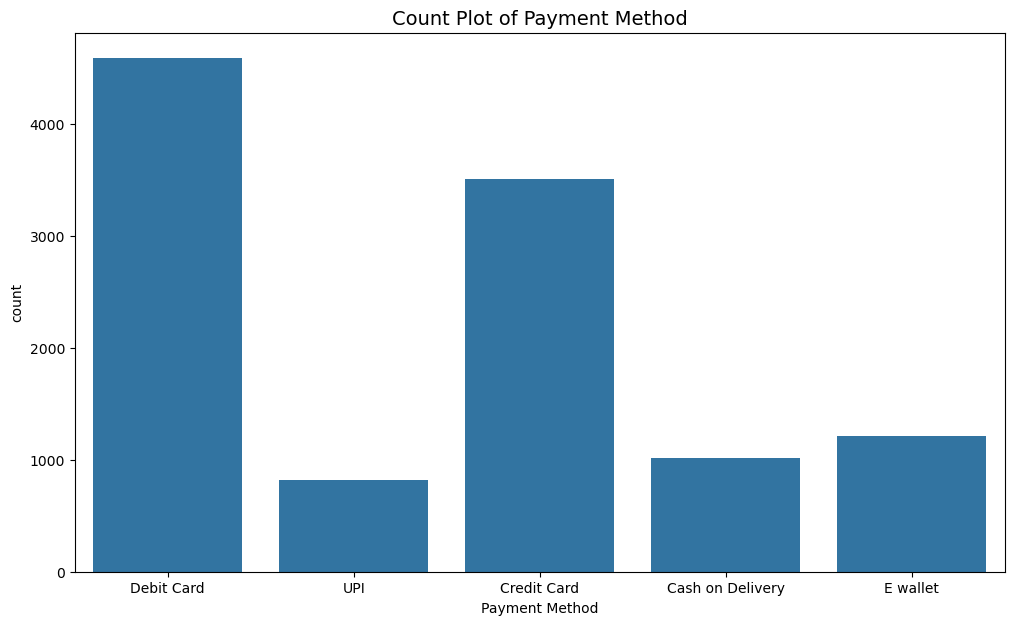

In [45]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Payment')
plt.title('Count Plot of Payment Method', fontsize=14)
plt.xlabel('Payment Method')
plt.show()

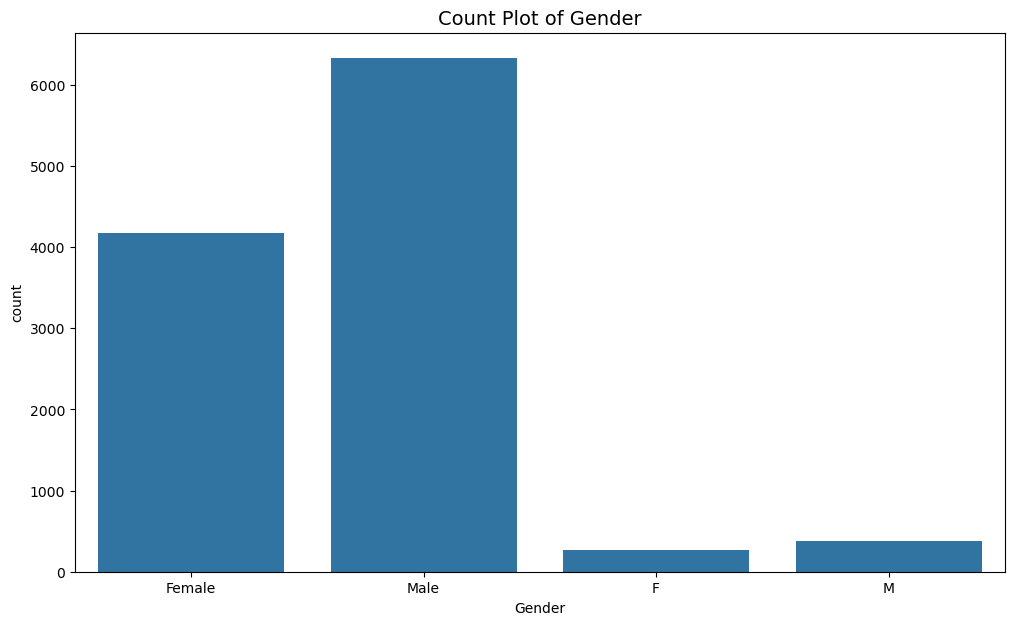

In [49]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Gender')
plt.title('Count Plot of Gender', fontsize=14)
plt.xlabel('Gender')
plt.show()

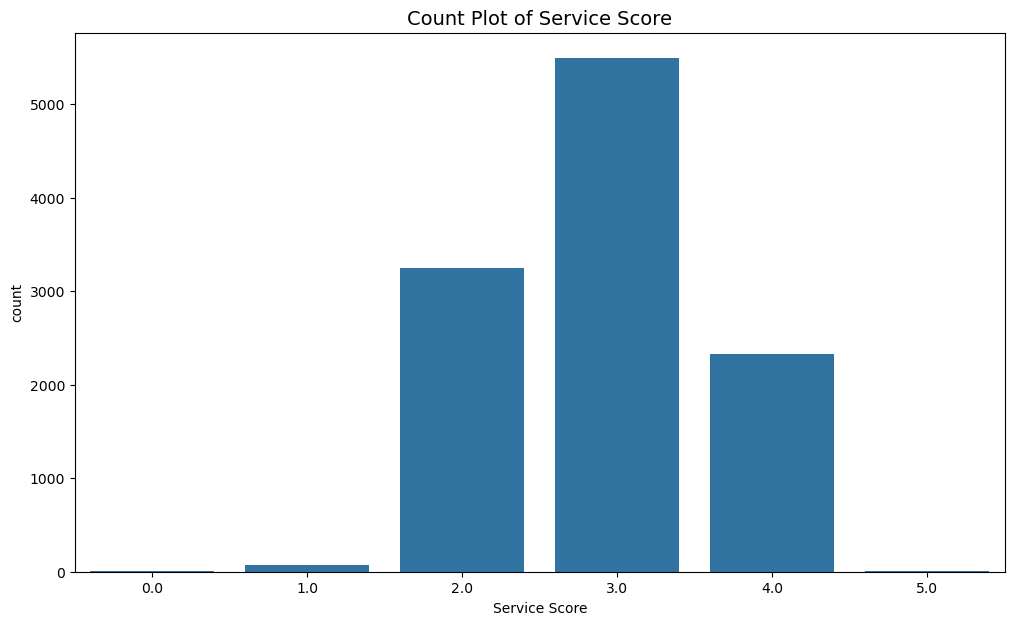

In [51]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Account_user_count')
plt.title('Count Plot of Account_user_count', fontsize=14)
plt.xlabel('Account_user_count')
plt.show()

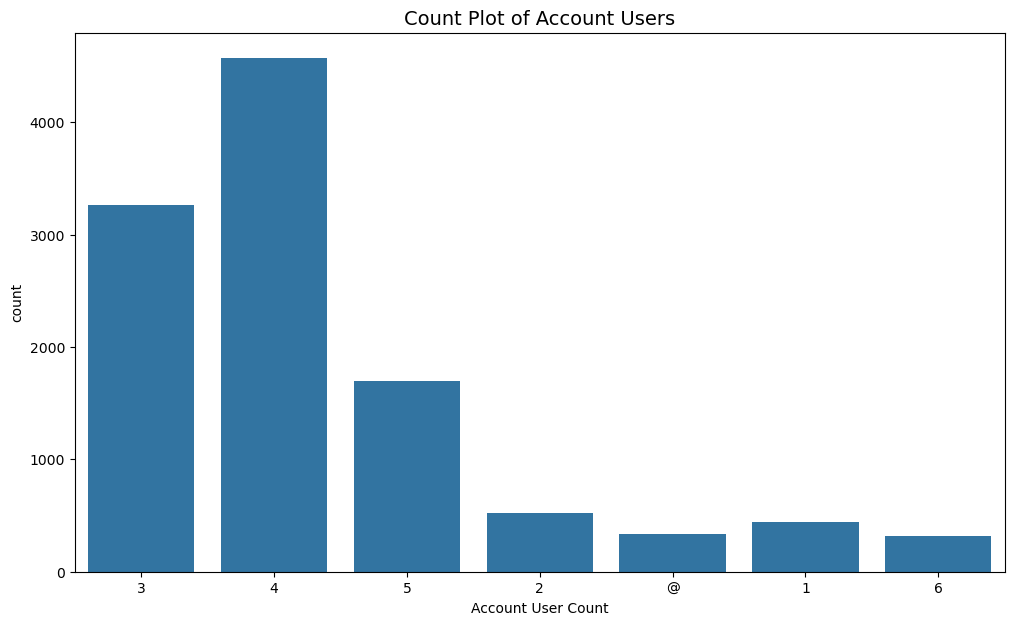

In [53]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Account_user_count')
plt.title('Count Plot of Account Users', fontsize=14)
plt.xlabel('Account User Count')
plt.show()

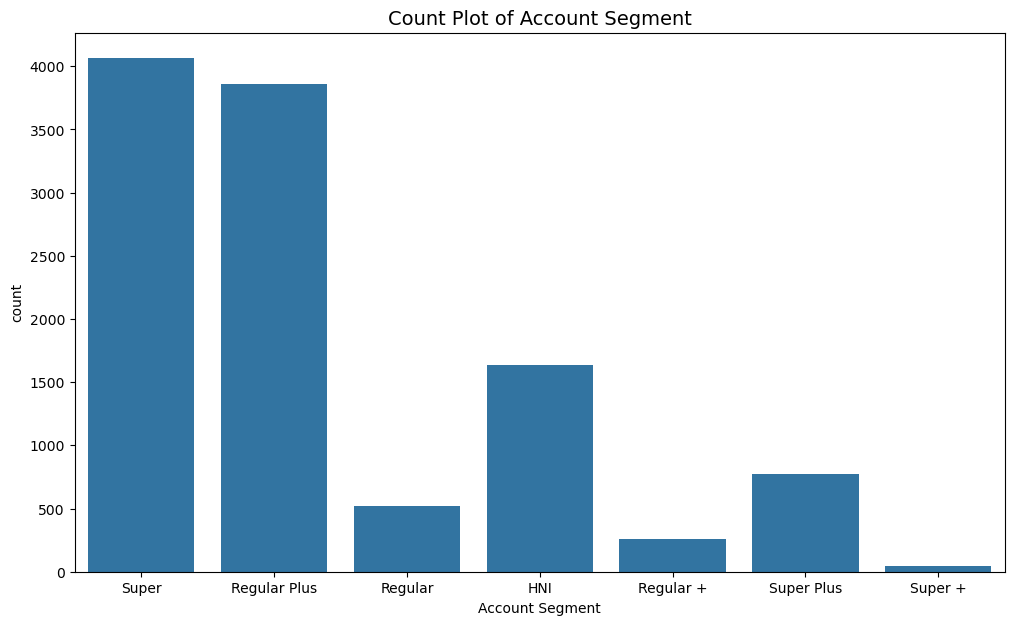

In [55]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'account_segment')
plt.title('Count Plot of Account Segment', fontsize=14)
plt.xlabel('Account Segment')
plt.show()

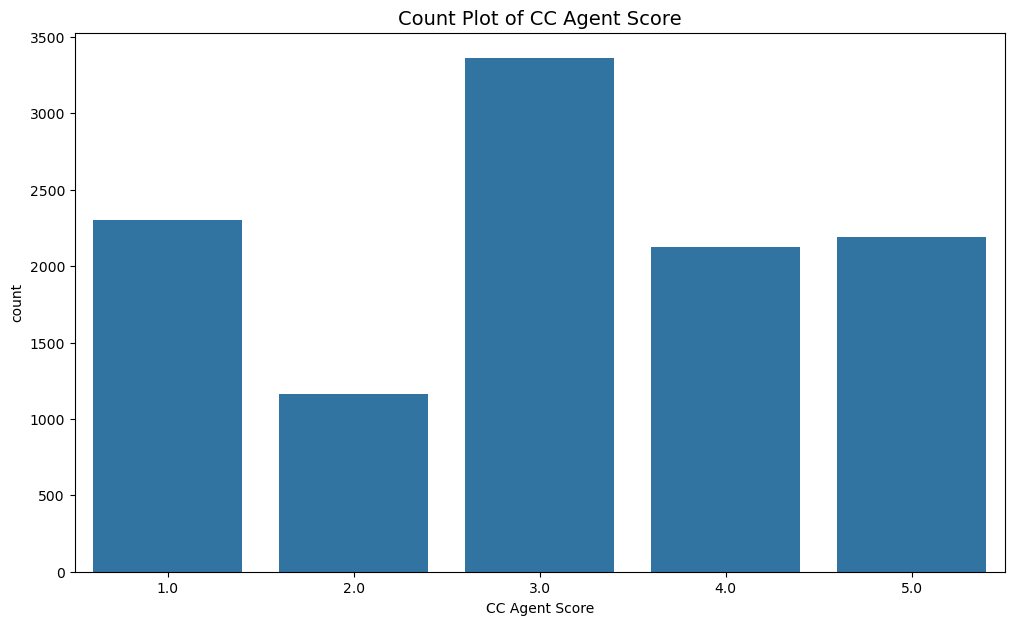

In [57]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'CC_Agent_Score')
plt.title('Count Plot of CC Agent Score', fontsize=14)
plt.xlabel('CC Agent Score')
plt.show()

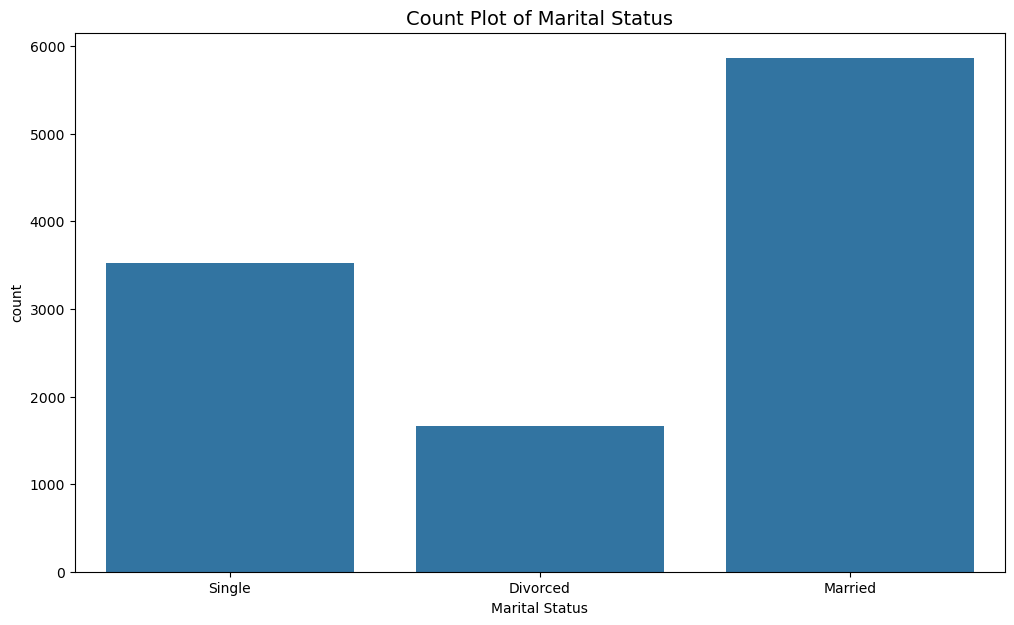

In [59]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Marital_Status')
plt.title('Count Plot of Marital Status', fontsize=14)
plt.xlabel('Marital Status')
plt.show()

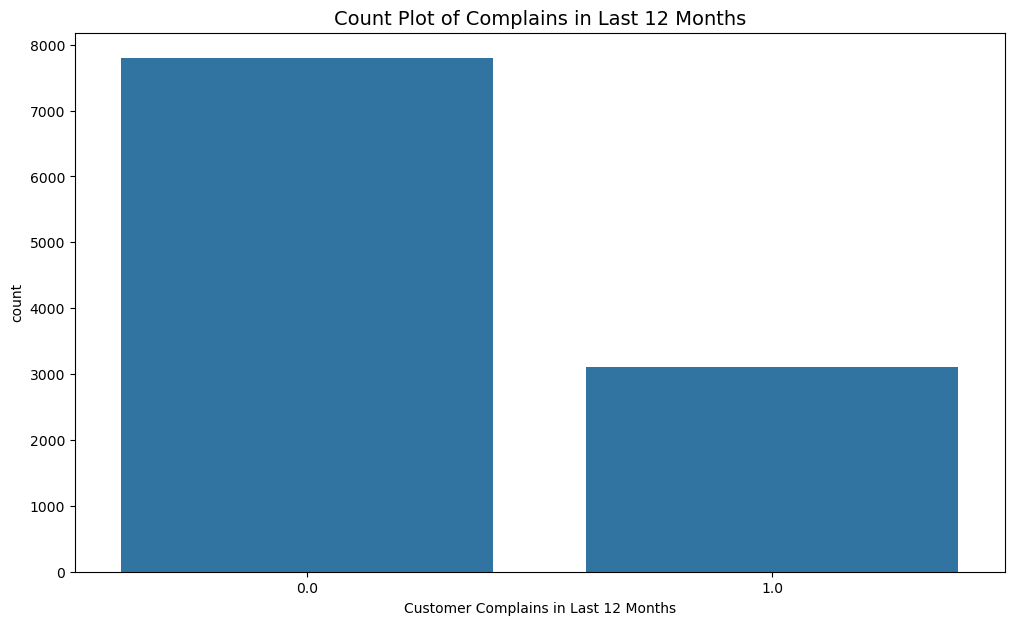

In [63]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Complain_ly')
plt.title('Count Plot of Complains in Last 12 Months', fontsize=14)
plt.xlabel('Customer Complains in Last 12 Months')
plt.show()

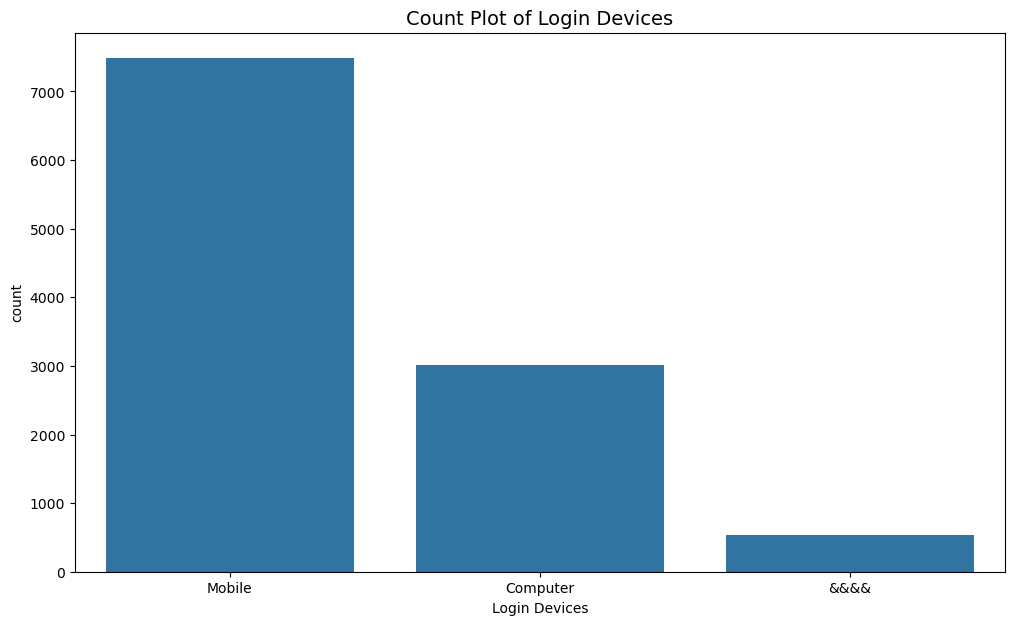

In [65]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Login_device')
plt.title('Count Plot of Login Devices', fontsize=14)
plt.xlabel('Login Devices')
plt.show()

## BIVARIATE ANALYSIS

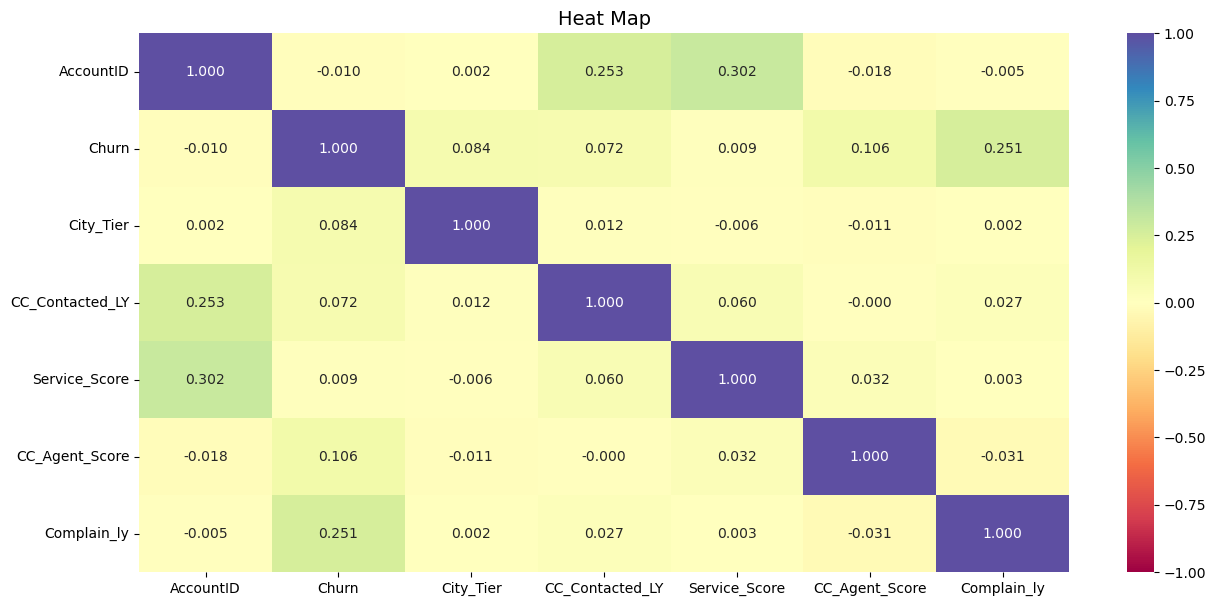

In [92]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral")
plt.title('Heat Map', fontsize=14)
plt.show()

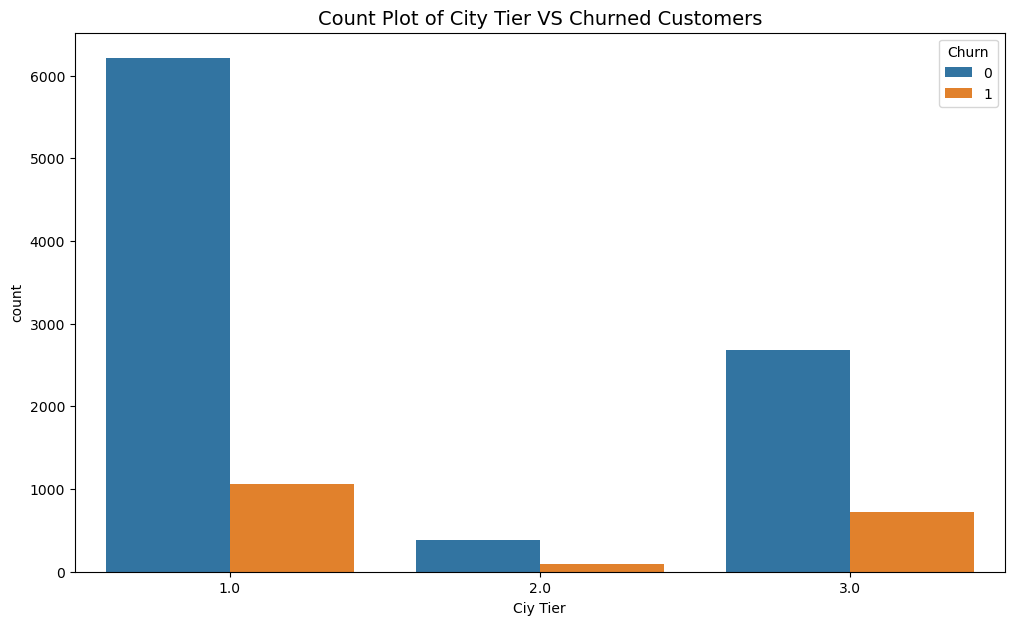

In [96]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'City_Tier',hue = 'Churn')
plt.title('Count Plot of City Tier VS Churned Customers', fontsize=14)
plt.xlabel('Ciy Tier')
plt.show()

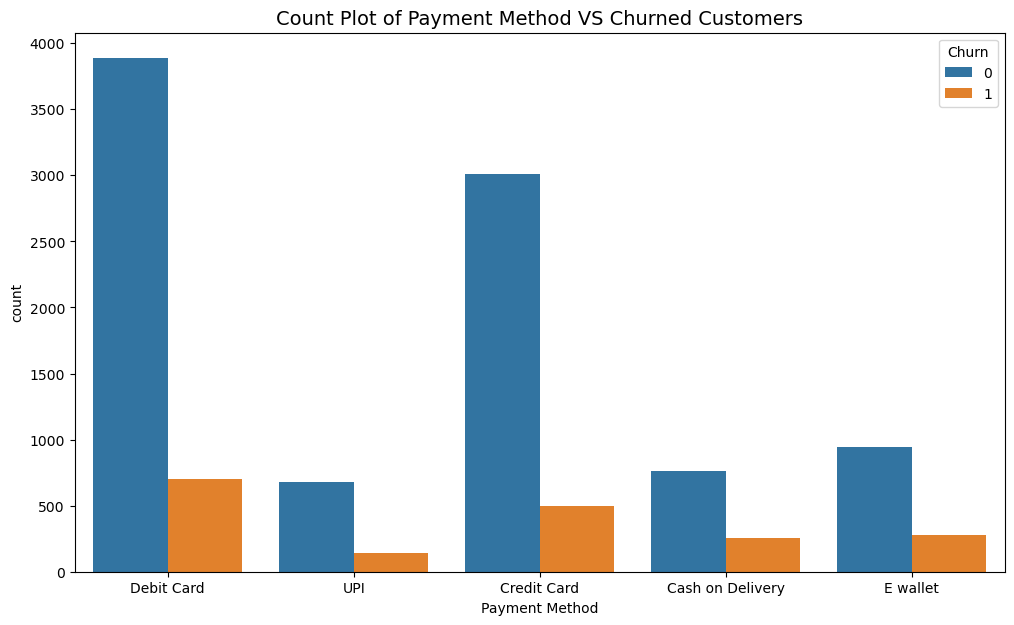

In [100]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Payment',hue = 'Churn')
plt.title('Count Plot of Payment Method VS Churned Customers', fontsize=14)
plt.xlabel('Payment Method')
plt.show()

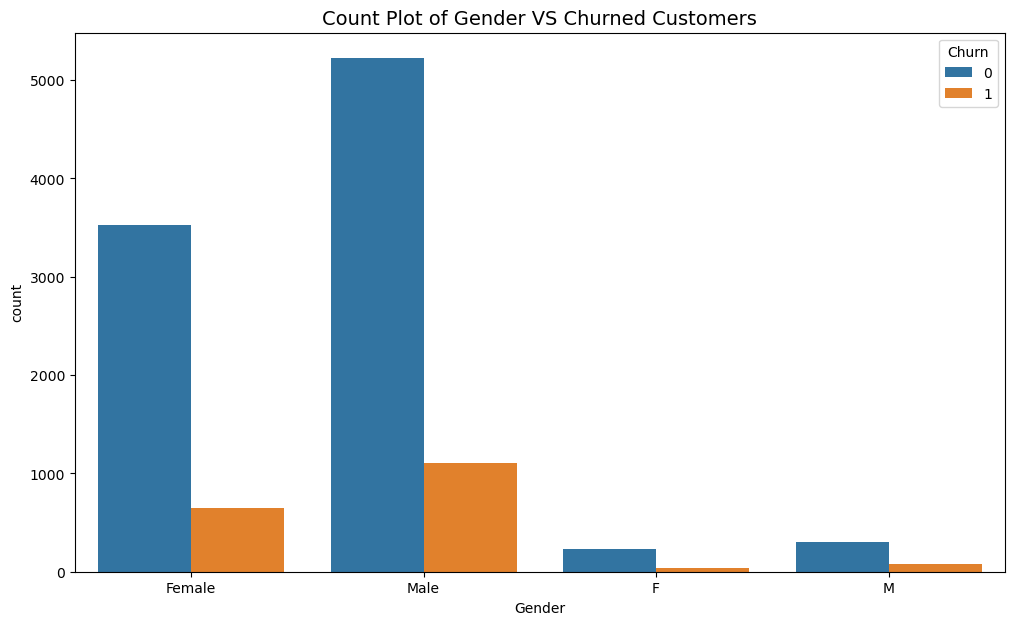

In [102]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Gender',hue = 'Churn')
plt.title('Count Plot of Gender VS Churned Customers', fontsize=14)
plt.xlabel('Gender')
plt.show()

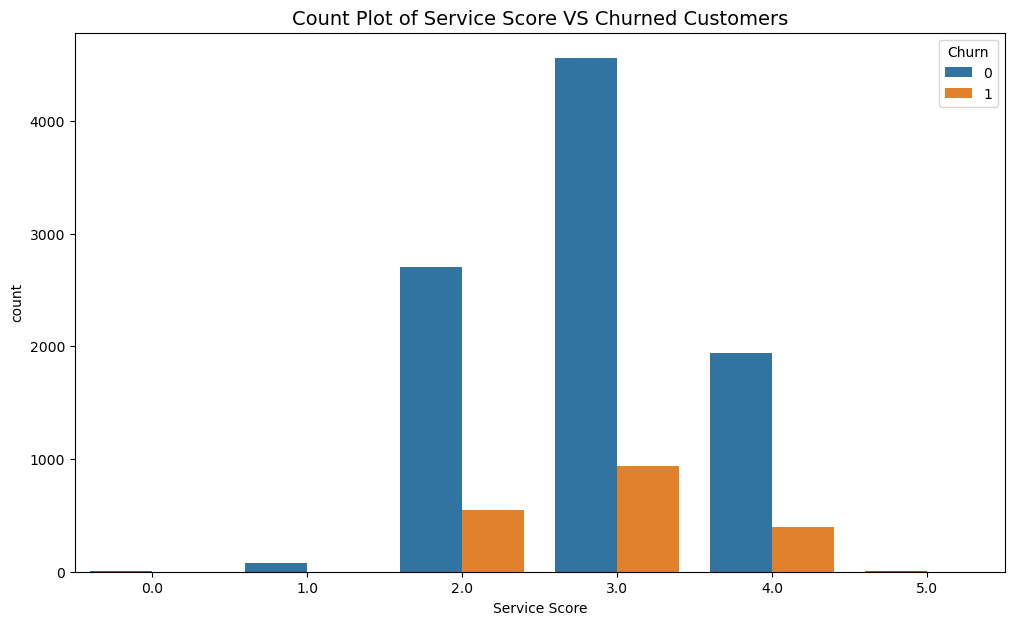

In [104]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Service_Score',hue = 'Churn')
plt.title('Count Plot of Service Score VS Churned Customers', fontsize=14)
plt.xlabel('Service Score')
plt.show()

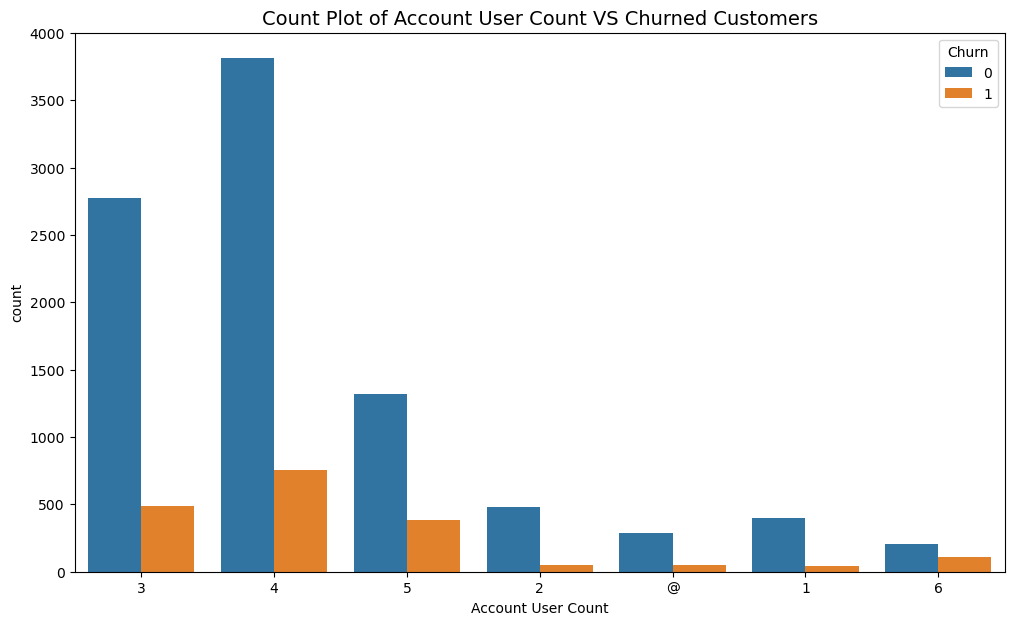

In [106]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Account_user_count',hue = 'Churn')
plt.title('Count Plot of Account User Count VS Churned Customers', fontsize=14)
plt.xlabel('Account User Count')
plt.show()

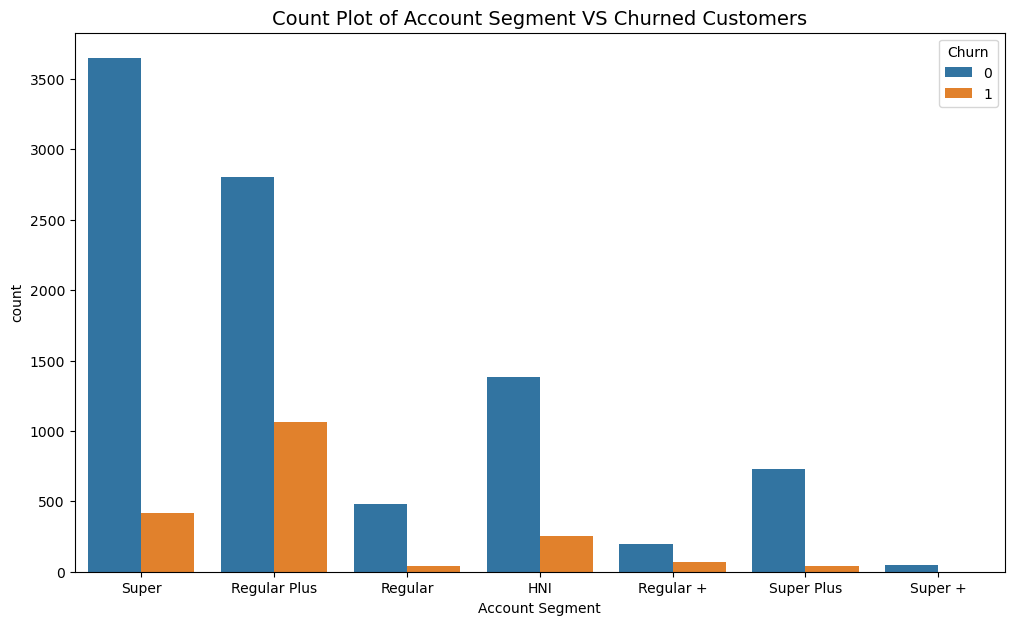

In [108]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'account_segment',hue = 'Churn')
plt.title('Count Plot of Account Segment VS Churned Customers', fontsize=14)
plt.xlabel('Account Segment')
plt.show()

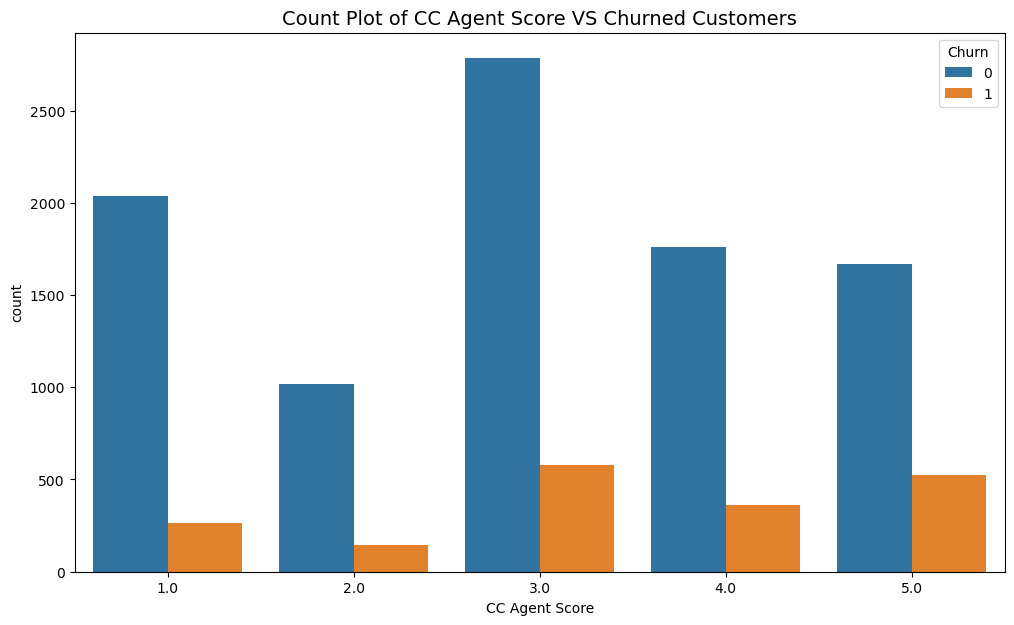

In [110]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'CC_Agent_Score',hue = 'Churn')
plt.title('Count Plot of CC Agent Score VS Churned Customers', fontsize=14)
plt.xlabel('CC Agent Score')
plt.show()

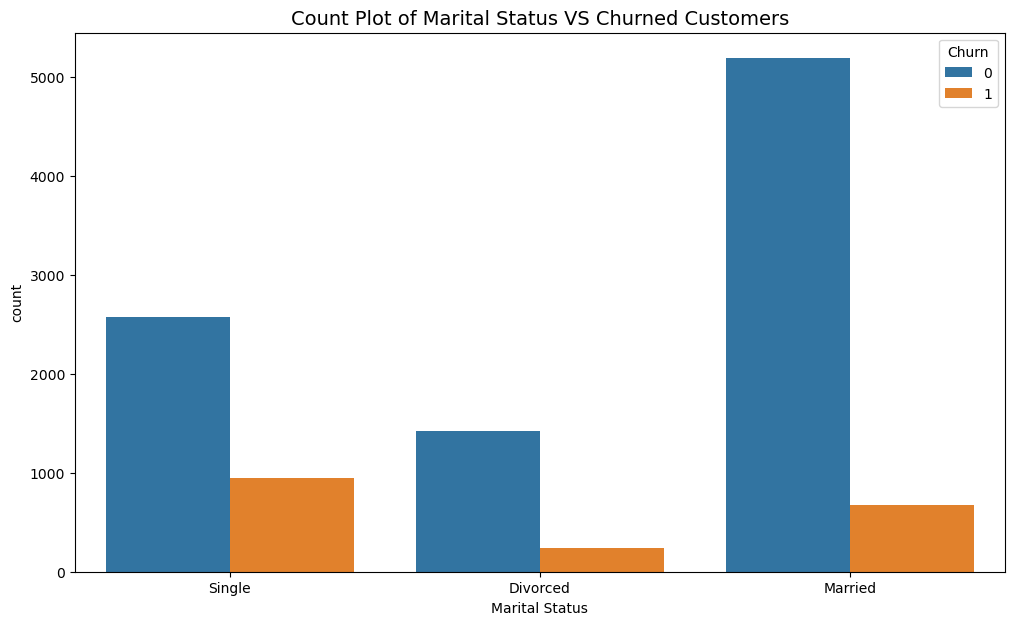

In [112]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Marital_Status',hue = 'Churn')
plt.title('Count Plot of Marital Status VS Churned Customers', fontsize=14)
plt.xlabel('Marital Status')
plt.show()

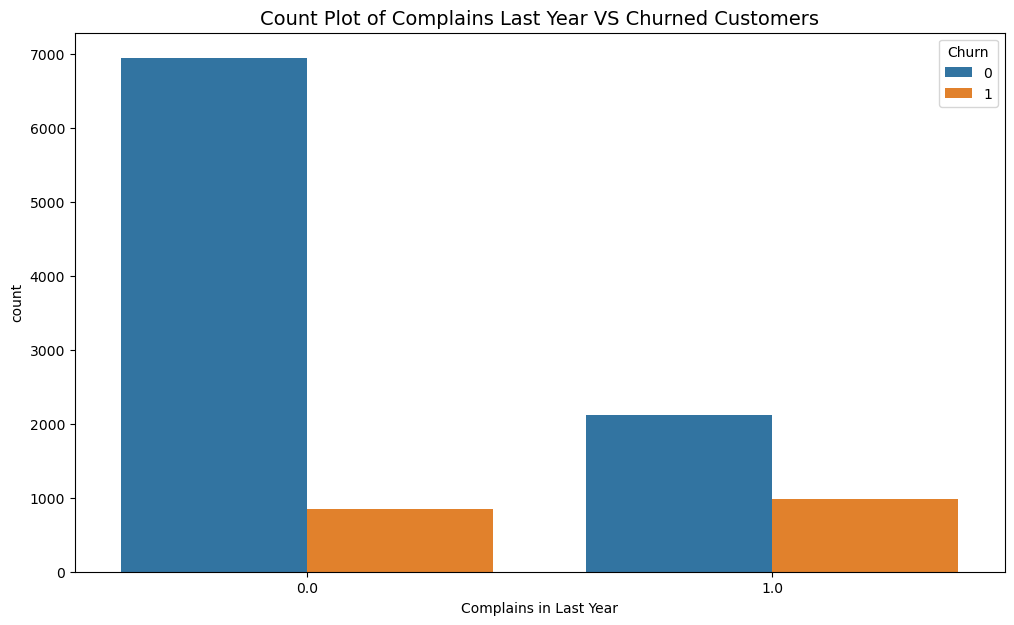

In [114]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Complain_ly',hue = 'Churn')
plt.title('Count Plot of Complains Last Year VS Churned Customers', fontsize=14)
plt.xlabel('Complains in Last Year')
plt.show()

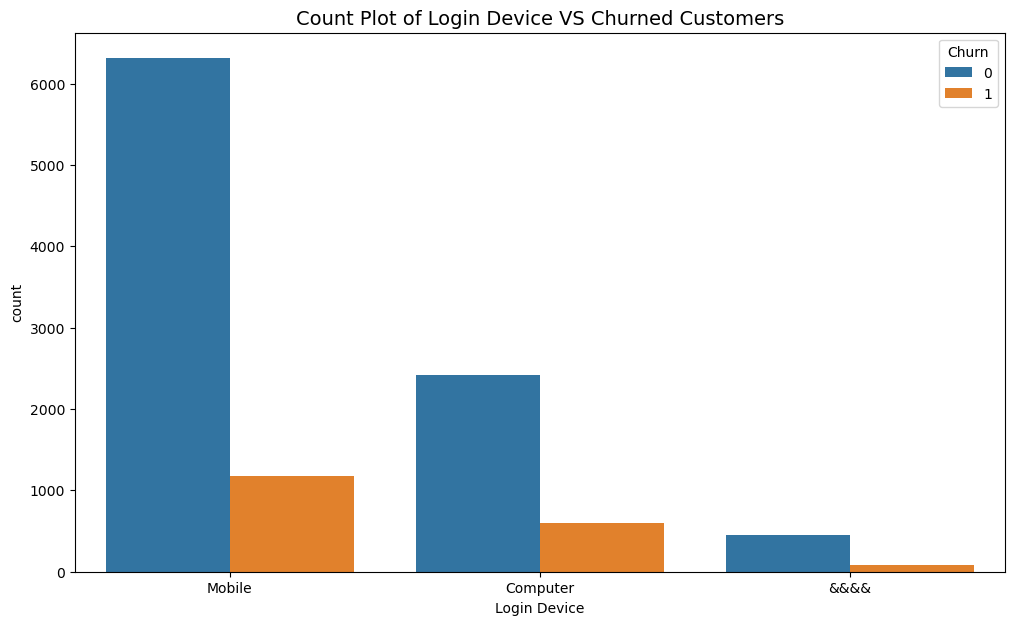

In [116]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Login_device',hue = 'Churn')
plt.title('Count Plot of Login Device VS Churned Customers', fontsize=14)
plt.xlabel('Login Device')
plt.show()

## REMOVAL OF UNWANTED VARIABLES

In [119]:
# Function to check all values in dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: count, dtype: int64


PAYMENT :  5
Payment
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: count, dtype: int64


GENDER :  4
Gender
F          270
M          376
Female    4178
Male      6328
Name: count, dtype: int64


ACCOUNT_USER_COUNT :  7
Account_user_count
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: count, dtype: int64


ACCOUNT_SEGMENT :  7
account_segment
Super +           47
Regular +        262
Regular          520
Super Plus  

In [121]:
# removing unwanted variables in Tenure
df['Tenure'] = df['Tenure'].replace('#',np.NaN)
df['Tenure'] = df['Tenure'].astype('Int64')
df["Tenure"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\1577291828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tenure'] = df['Tenure'].replace('#',np.NaN)


<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [123]:
# replace null values with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [127]:
# removing unwanted variables in Gender
df['Gender'] = df['Gender'].replace('F','Female')
df['Gender'] = df['Gender'].replace('M','Male')

In [129]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [131]:
# removing unwanted variables in Account User Count
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['Account_user_count'] = df['Account_user_count'].astype('float64')

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\1153643558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)


In [133]:
df["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [135]:
# removing unwanted variables in Rev Per Month
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)
df['rev_per_month'] = df['rev_per_month'].astype('float64')
df["rev_per_month"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\335428168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)


array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [137]:
# removing unwanted variables in Rev Growth yoy'
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')
df["rev_growth_yoy"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\1349983468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)


array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [139]:
# removing unwanted variables in Coupon Used For Payment
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('float64')
df["coupon_used_for_payment"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\3523376803.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)


array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [141]:
# removing unwanted variables in Day Since CC Connect
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype('float64')
df["Day_Since_CC_connect"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\139674396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)


array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [198]:
# removing unwanted variables in Cashback
df['cashback'] = df['cashback'].replace('$',np.NaN)
df['cashback'] = df['cashback'].astype('float64')
df["cashback"].unique

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\257291789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cashback'] = df['cashback'].replace('$',np.NaN)


<bound method Series.unique of 0        159.93
1        120.90
2           NaN
3        134.07
4        129.60
          ...  
11255    153.71
11256    226.91
11257    191.42
11258    179.90
11259    175.04
Name: cashback, Length: 11260, dtype: float64>

In [145]:
# removing unwanted variables in Login Device
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)
df["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

## MISSING VALUE TREATMENT

In [148]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   471
Login_device               760
dtype: int64

In [150]:
# treatment in City Tier
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0])

In [154]:
# treatment in CC_Contacted_LY
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())

In [162]:
# treatment in Payment
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

In [166]:
# treatment in Gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [168]:
# treatment in Service_Score
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [174]:
# treatment in Account_user_count
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].median())

In [176]:
# treatment in account_segment
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [180]:
# treatment in CC_Agent_Score
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [182]:
# treatment in Marital_Status
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [186]:
# treatment in rev_per_month 
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())

In [188]:
# treatment in Complain_ly
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [190]:
# treatment in rev_growth_yoy 
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [192]:
# treatment in coupon_used_for_payment
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())

In [194]:
# treatment in Day_Since_CC_connect
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())

In [200]:
# treatment in cashback
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [204]:
# treatment in Login_device
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [206]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## OUTLIER TREATMENT

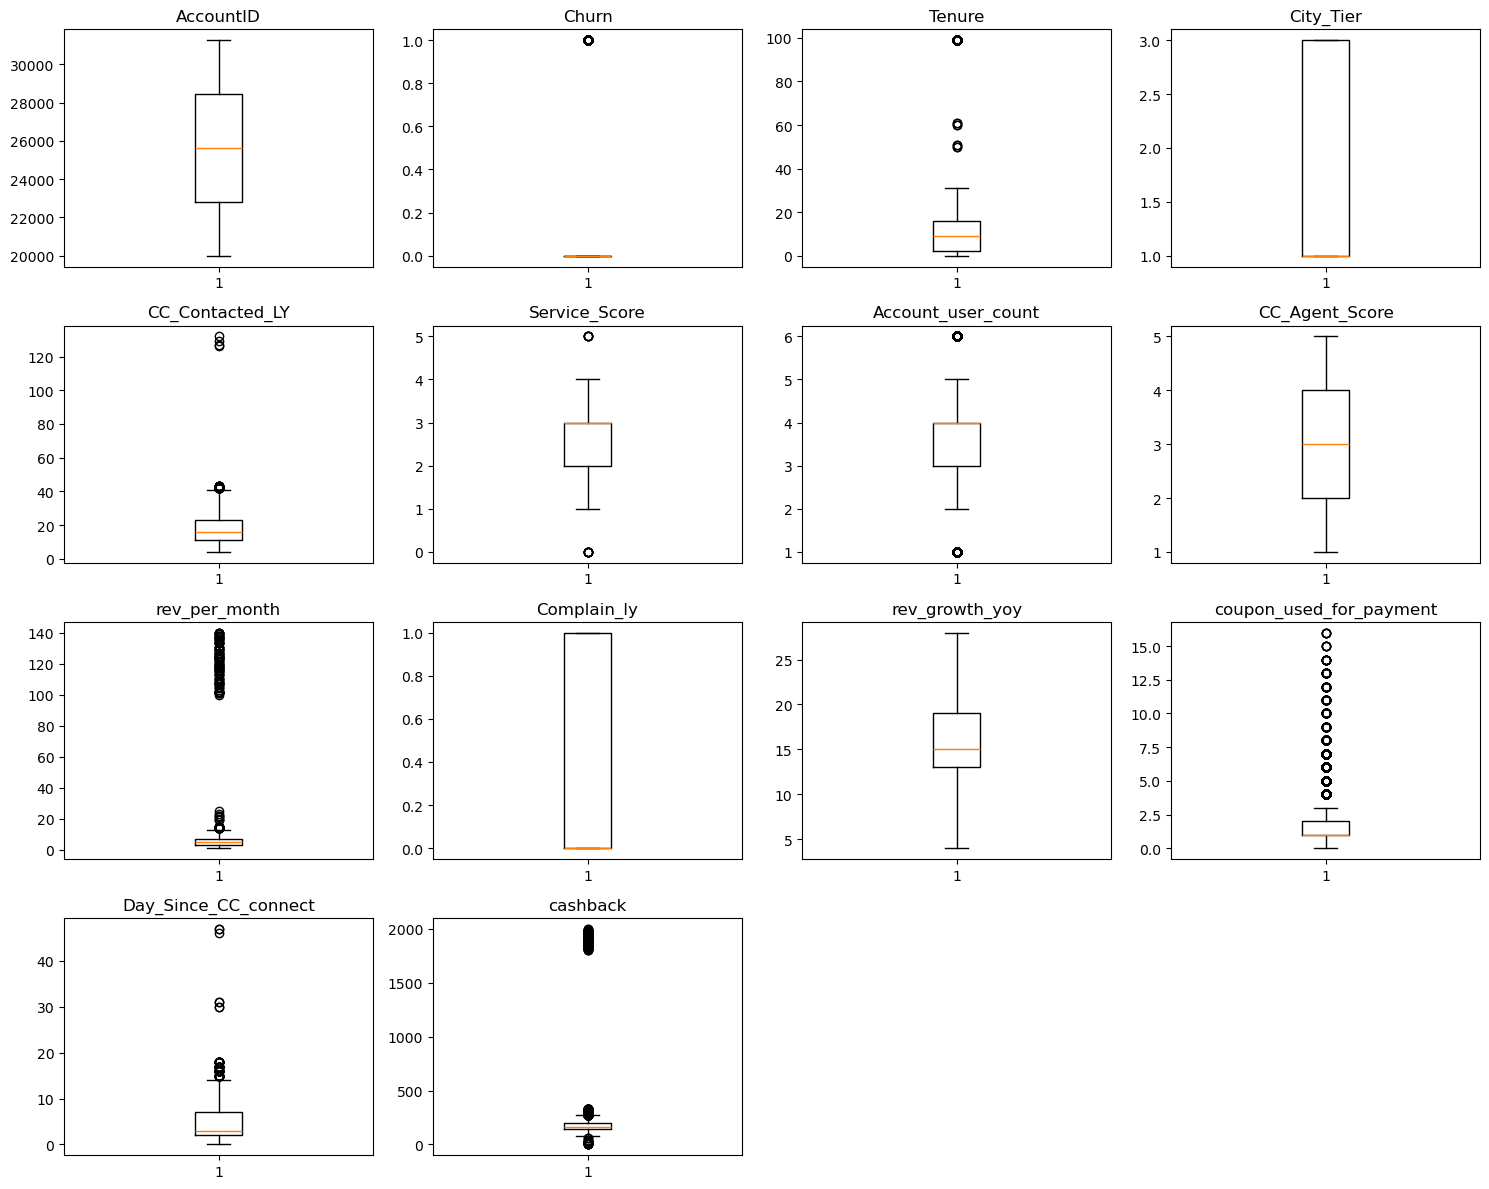

In [215]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [223]:
# treating outliers
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [229]:
# List of columns to apply the outlier treatment
columns_to_process = [
    'Tenure', 'CC_Contacted_LY', 'Account_user_count', 'cashback', 'rev_per_month', 
    'Day_Since_CC_connect', 'coupon_used_for_payment', 'rev_growth_yoy'
]

for col in columns_to_process:
    lw, up = outlier_treatment(df[col])
    df[col] = np.clip(df[col], lw, up)

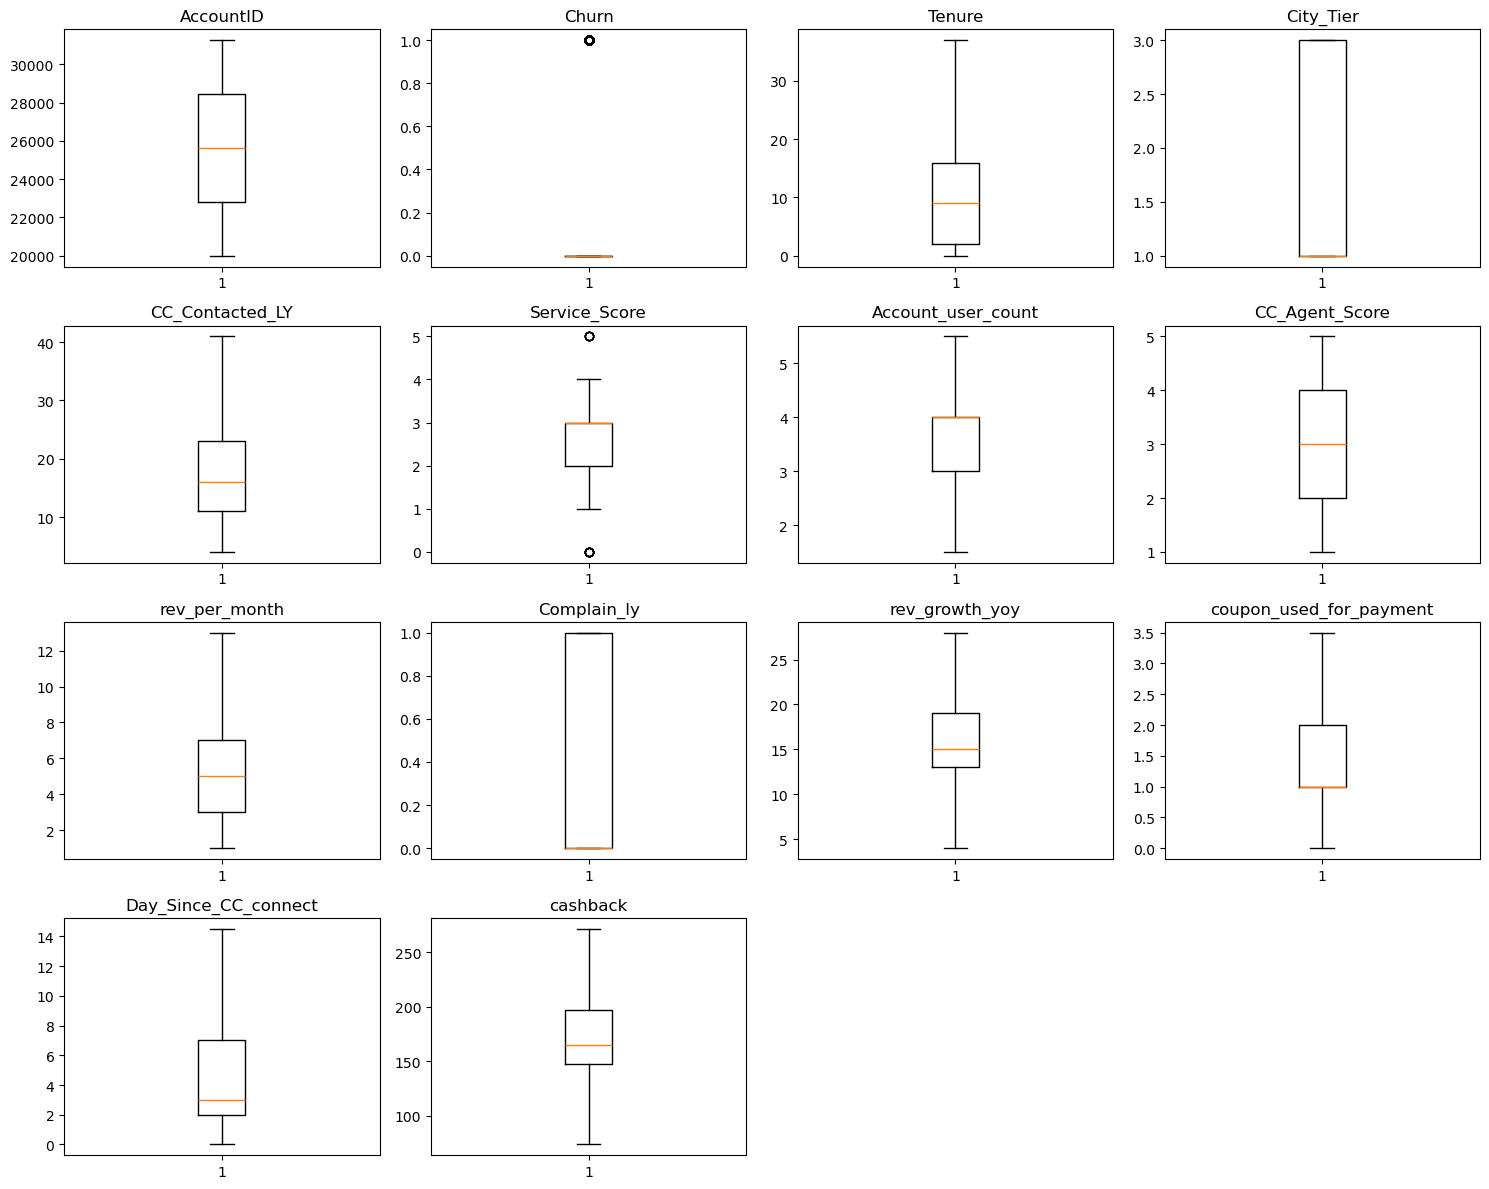

In [233]:
# check outliers post treatment
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## VARIABLE TRANSFORMATION

In [240]:
# encoding payment variable
payment_mapping = {
    'Debit Card': 1,
    'UPI': 2,
    'Credit Card': 3,
    'Cash on Delivery': 4,
    'E wallet': 5
}

df['Payment'] = df['Payment'].replace(payment_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\357238523.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment'] = df['Payment'].replace(payment_mapping)


In [242]:
# encoding gender variable
gender_mapping = {
    'Female': 1, 'F': 1,
    'Male': 2, 'M': 2
}

df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\3322179126.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


In [244]:
# encoding account segment variable
account_segment_mapping = {
    'Super': 1,
    'Regular Plus': 2, 'Regular +': 2,
    'Regular': 3,
    'HNI': 4,
    'Super Plus': 5, 'Super +': 5
}

df['account_segment'] = df['account_segment'].replace(account_segment_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\1112756489.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['account_segment'] = df['account_segment'].replace(account_segment_mapping)


In [246]:
# encoding marital status variable
marital_status_mapping = {
    'Single': 1,
    'Divorced': 2,
    'Married': 3
}

df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\2153673498.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)


In [250]:
# encoding login device variable
login_device_mapping = {
    'Mobile': 1,
    'Computer': 2
}

df['Login_device'] = df['Login_device'].replace(login_device_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_11164\1616452952.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Login_device'] = df['Login_device'].replace(login_device_mapping)


In [254]:
# List of columns to scale
columns_to_scale = [
    'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment',
    'Gender', 'Service_Score', 'Account_user_count', 'account_segment',
    'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
    'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 
    'cashback', 'Login_device'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to each column in the list
for col in columns_to_scale:
    df[f'Scaled_{col}'] = scaler.fit_transform(df[[col]])

In [258]:
# creating new dataframe with scaled data
scaled_columns = [col for col in df.columns if col.startswith('Scaled_')]
df_scaled = df[scaled_columns]
df_scaled

,Scaled_Churn,Scaled_Tenure,Scaled_City_Tier,Scaled_CC_Contacted_LY,Scaled_Payment,Scaled_Gender,Scaled_Service_Score,Scaled_Account_user_count,Scaled_account_segment,Scaled_CC_Agent_Score,Scaled_Marital_Status,Scaled_rev_per_month,Scaled_Complain_ly,Scaled_rev_growth_yoy,Scaled_coupon_used_for_payment,Scaled_Day_Since_CC_connect,Scaled_cashback,Scaled_Login_device
0,1.0,0.108108,1.0,0.054054,0.00,0.0,0.6,0.375,0.00,0.25,0.0,0.666667,1.0,0.291667,0.285714,0.344828,0.435907,0.0
1,1.0,0.000000,0.0,0.108108,0.25,1.0,0.6,0.625,0.25,0.50,0.0,0.500000,1.0,0.458333,0.000000,0.000000,0.238466,0.0
2,1.0,0.000000,0.0,0.702703,0.00,1.0,0.4,0.625,0.25,0.50,0.0,0.416667,1.0,0.416667,0.000000,0.206897,0.462819,0.0
3,1.0,0.000000,1.0,0.297297,0.00,1.0,0.4,0.625,0.00,1.00,0.0,0.583333,0.0,0.791667,0.000000,0.206897,0.305089,0.0
4,1.0,0.000000,0.0,0.216216,0.50,1.0,0.4,0.375,0.25,1.00,0.0,0.166667,0.0,0.291667,0.285714,0.206897,0.282477,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,0.270270,0.0,0.810811,0.50,1.0,0.6,0.125,0.00,0.00,1.0,0.666667,0.0,0.625000,0.285714,0.275862,0.404442,1.0
11256,0.0,0.351351,0.0,0.405405,0.50,1.0,0.6,0.875,0.75,1.00,1.0,0.500000,0.0,0.500000,0.285714,0.551724,0.774737,0.0
11257,0.0,0.027027,0.0,0.270270,0.00,1.0,0.6,0.125,0.00,0.75,1.0,0.500000,1.0,0.750000,0.285714,0.275862,0.595204,0.0
11258,0.0,0.621622,1.0,0.189189,0.50,1.0,0.8,0.875,0.00,0.75,1.0,0.500000,0.0,0.500000,0.571429,0.620690,0.536928,1.0


In [260]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Scaled_Churn                    11260 non-null  float64
 1   Scaled_Tenure                   11260 non-null  float64
 2   Scaled_City_Tier                11260 non-null  float64
 3   Scaled_CC_Contacted_LY          11260 non-null  float64
 4   Scaled_Payment                  11260 non-null  float64
 5   Scaled_Gender                   11260 non-null  float64
 6   Scaled_Service_Score            11260 non-null  float64
 7   Scaled_Account_user_count       11260 non-null  float64
 8   Scaled_account_segment          11260 non-null  float64
 9   Scaled_CC_Agent_Score           11260 non-null  float64
 10  Scaled_Marital_Status           11260 non-null  float64
 11  Scaled_rev_per_month            11260 non-null  float64
 12  Scaled_Complain_ly              

In [311]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

## CLUSTERING

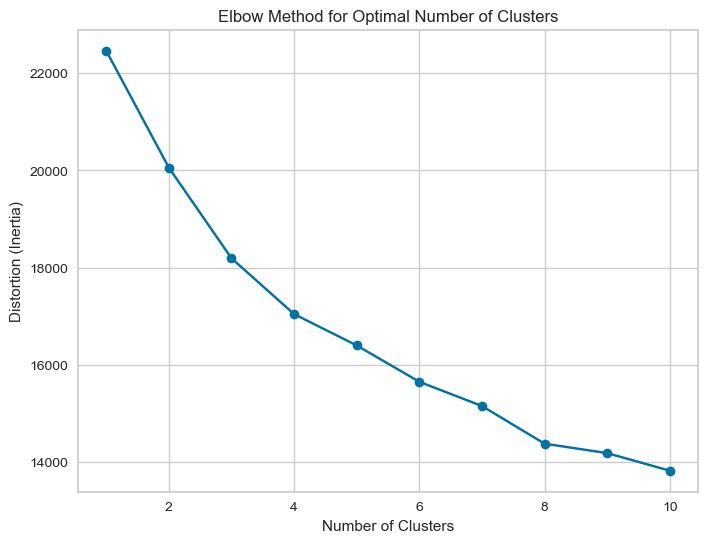

In [279]:
# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
# Elbow Method to determine the optimal number of clusters
distortions = []
for i in range(1, 11):  # Check for cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)  # Inertia is the distortion value

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()


In [305]:
# Applying KMeans with the optimal number of clusters
optimal_clusters = 4
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
df_scaled.loc[:, 'Cluster'] = kmeans_final.fit_predict(df_scaled)
df_scaled.head()

,Scaled_Churn,Scaled_Tenure,Scaled_City_Tier,Scaled_CC_Contacted_LY,Scaled_Payment,Scaled_Gender,Scaled_Service_Score,Scaled_Account_user_count,Scaled_account_segment,Scaled_CC_Agent_Score,Scaled_Marital_Status,Scaled_rev_per_month,Scaled_Complain_ly,Scaled_rev_growth_yoy,Scaled_coupon_used_for_payment,Scaled_Day_Since_CC_connect,Scaled_cashback,Scaled_Login_device,Cluster
0,1.0,0.108108,1.0,0.054054,0.00,0.0,0.6,0.375,0.00,0.25,0.0,0.666667,1.0,0.291667,0.285714,0.344828,0.435907,0.0,2
1,1.0,0.000000,0.0,0.108108,0.25,1.0,0.6,0.625,0.25,0.50,0.0,0.500000,1.0,0.458333,0.000000,0.000000,0.238466,0.0,0
2,1.0,0.000000,0.0,0.702703,0.00,1.0,0.4,0.625,0.25,0.50,0.0,0.416667,1.0,0.416667,0.000000,0.206897,0.462819,0.0,0
3,1.0,0.000000,1.0,0.297297,0.00,1.0,0.4,0.625,0.00,1.00,0.0,0.583333,0.0,0.791667,0.000000,0.206897,0.305089,0.0,2
4,1.0,0.000000,0.0,0.216216,0.50,1.0,0.4,0.375,0.25,1.00,0.0,0.166667,0.0,0.291667,0.285714,0.206897,0.282477,0.0,1


In [307]:
df_scaled.groupby('Cluster').mean()

,Scaled_Churn,Scaled_Tenure,Scaled_City_Tier,Scaled_CC_Contacted_LY,Scaled_Payment,Scaled_Gender,Scaled_Service_Score,Scaled_Account_user_count,Scaled_account_segment,Scaled_CC_Agent_Score,Scaled_Marital_Status,Scaled_rev_per_month,Scaled_Complain_ly,Scaled_rev_growth_yoy,Scaled_coupon_used_for_payment,Scaled_Day_Since_CC_connect,Scaled_cashback,Scaled_Login_device
Cluster,,,,,,,,,,,,,,,,,,
0,0.266190,0.276831,0.166667,0.385530,0.308304,0.515693,0.578387,0.548421,0.312277,0.503874,0.649583,0.351013,1.000000,0.506986,0.421761,0.292028,0.518051,0.270957
1,0.101388,0.284270,0.035401,0.361998,0.269329,1.000000,0.582781,0.546340,0.292410,0.504956,0.630416,0.355730,0.000000,0.517287,0.398633,0.311263,0.509801,0.273010
2,0.270358,0.235584,0.998168,0.381096,0.529723,0.807410,0.578502,0.562449,0.268424,0.524735,0.554967,0.343682,0.241857,0.495759,0.431363,0.316284,0.539782,0.339984
3,0.074020,0.305015,0.235486,0.369984,0.330370,0.000000,0.582003,0.556060,0.312228,0.535287,0.610305,0.364659,0.000000,0.508119,0.441841,0.333642,0.532319,0.194848
